In [1]:
import pandas as pd
df=pd.read_csv('indeed_job_dataset.csv')

In [2]:
dic={}
for skills in df.Skill.dropna():
    #print(skills)
    lst=skills[1:-1].split(', ')
    for item in lst:
        dic[item]=dic.get(item,0)+1
dic=sorted(dic.items(),key=lambda x:x[1],reverse=True)
print(dic[:50])

[("'Python'", 3325), ("'SQL'", 3104), ("'Machine Learning'", 2297), ("'R'", 2234), ("'Hadoop'", 1714), ("'Spark'", 1531), ("'Java'", 1480), ("'Tableau'", 1236), ("'Data Mining'", 1059), ("'Hive'", 966), ("'SAS'", 941), ("'Big Data'", 916), ("'AWS'", 883), ("'Scala'", 837), ("'NoSQL'", 607), ("'C/C++'", 577), ("'Natural Language Processing'", 570), ("'Oracle'", 526), ("'Data Warehouse'", 520), ("'Linux'", 490), ("'AI'", 479), ("'Microsoft SQL Server'", 476), ("'TensorFlow'", 465), ("'Kafka'", 456), ("'Data Analysis'", 448), ("'Azure'", 442), ("'MATLAB'", 418), ("'Microsoft Office'", 383), ("'Scripting'", 377), ("'Pig'", 349), ("'Git'", 336), ("'Microsoft Powerpoint'", 334), ("'Excel'", 331), ("'Design Experience'", 317), ("'JavaScript'", 309), ("'HBase'", 307), ("'PostgreSQL'", 289), ("'Cassandra'", 289), ("'Perl'", 283), ("'MySQL'", 283), ("'SPSS'", 278), ("'Software Development'", 271), ("'Shell Scripting'", 261), ("'Data Science'", 249), ("'Docker'", 238), ("'MongoDB'", 237), ("'.Net

In [11]:
corpus=[]
for skills in df.Skill.dropna():
    lst=skills[1:-1].split(', ')
    words=[]
    for item in lst:
        words.append(item[1:-1])
    corpus.append(words)
print(corpus[:5])

[['SAP', 'SQL'], ['Machine Learning', 'R', 'SAS', 'SQL', 'Python'], ['Data Mining', 'Data Management', 'R', 'SAS', 'SQL', 'STATA', 'SPSS', 'Data Analysis', 'Python'], ['Certified Internal Auditor'], ['Statistical Software', 'Time Management', 'R', 'Microsoft Office', 'Excel', 'Tableau', 'Data Science']]


In [4]:
text_data=corpus

In [6]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [7]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.111*"R" + 0.096*"Python" + 0.076*"SQL" + 0.067*"Machine Learning"')
(1, '0.064*"Spark" + 0.063*"Hadoop" + 0.059*"Python" + 0.053*"Java"')
(2, '0.107*"SQL" + 0.097*"Tableau" + 0.070*"Python" + 0.064*"Machine Learning"')


In [9]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/eliu/opt/anaconda3/envs/usf/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [10]:
pyLDAvis.save_html(lda_display, 'lda_3topics.html')


In [ ]:
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

In [ ]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [39]:
topic1=['Java','JavaScript','Git','.Net']
topic2=['Machine Learning','Python','R','Natural Language Processing']
topic3=['Spark','Hadoop','Python','Hive']
topic4=['SQL','Hadoop','Data Warehouse','Python']
topic5=['SQL','R','Tableau','SAS']

In [47]:
df=df.loc[~(df.Skill.isna())]
t3=[]
for skill in df.Skill:
    if 'Spark' in skill and 'Hadoop' in skill and 'Python' in skill and 'Hive' in skill:
        t3.append(1)
    else:
        t3.append(0)

In [48]:
df['t3']=t3
df['id']=df.index

In [49]:
df.head()

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries,t3,id
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,1,0,0,0,1,0,0,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,1,0,0,0,0,0,0,0,2
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,0,0,0,0,0,0,1,0,3
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,1,0,0,0,0,4


In [55]:
df.groupby(['t3','Queried_Salary']).agg({'id':'count'}).reset_index()

,t3,Queried_Salary,id
0,0,100000-119999,1263
1,0,120000-139999,1099
2,0,140000-159999,742
3,0,80000-99999,873
4,0,<80000,686
5,0,>160000,366
6,1,100000-119999,97
7,1,120000-139999,173
8,1,140000-159999,120
9,1,80000-99999,21


In [70]:
df.groupby(['t3','Job_Title']).agg({'id':'count'}).reset_index().sort_values(['t3','id'],ascending=False)

,t3,Job_Title,id
2137,1,Data Scientist,58
2119,1,Data Engineer,34
2218,1,Senior Data Scientist,26
2092,1,Big Data Engineer - AWS & Hadoop,25
2207,1,Senior Data Engineer,25
2094,1,Big Data Engineer Consultant,16
2088,1,Big Data Engineer,15
2242,1,Staff Data Scientist,13
2085,1,"Associate, Data Engineer, Healthcare",11
2205,1,Senior Big Data Engineer,10


In [46]:
topic2

['Machine Learning', 'Python', 'R', 'Natural Language Processing']

In [52]:
df=df.loc[~(df.Skill.isna())]
t2=[]
for skill in df.Skill:
    if 'Machine Learning' in skill and 'Python' in skill and 'R' in skill and 'Natural Language Processing' in skill:
        t2.append(1)
    else:
        t2.append(0)

In [53]:
df['t2']=t2

In [54]:
df.groupby(['t2','Queried_Salary']).agg({'id':'count'})

id
t2 Queried_Salary      
0  100000-119999   1304
   120000-139999   1184
   140000-159999    788
   80000-99999      885
   <80000           683
   >160000          381
1  100000-119999     56
   120000-139999     88
   140000-159999     74
   80000-99999        9
   <80000             4
   >160000           27

In [56]:
df.groupby(['t2','Job_Type']).agg({'id':'count'})

id
t2 Job_Type            
0  data_analyst    1625
   data_engineer   1347
   data_scientist  2253
1  data_analyst       5
   data_engineer     10
   data_scientist   243

In [71]:
df.groupby(['t2','Job_Title']).agg({'id':'count'}).reset_index().sort_values(['t2','id'],ascending=False)

,t2,Job_Title,id
2139,1,Data Scientist,59
2220,1,Senior Data Scientist,26
2239,1,Staff Data Scientist,11
2175,1,"Data Scientist, Mid",8
2130,1,"Associate, Data Scientist, Financial Services",7
2202,1,Lead Data Scientist,6
2212,1,Principal Data Scientist,6
2236,1,Sr. Data Scientist,6
2137,1,Data Engineer,4
2176,1,"Data Scientist, Senior",4


In [57]:
topic5

['SQL', 'R', 'Tableau', 'SAS']

In [59]:
df=df.loc[~(df.Skill.isna())]
t5=[]
for skill in df.Skill:
    if 'SQL' in skill and 'Tableau' in skill and 'R' in skill and 'SAS' in skill:
        t5.append(1)
    else:
        t5.append(0)
df['t5']=t5

In [60]:
df.groupby(['t5','Queried_Salary']).agg({'id':'count'})

id
t5 Queried_Salary      
0  100000-119999   1278
   120000-139999   1240
   140000-159999    839
   80000-99999      845
   <80000           663
   >160000          388
1  100000-119999     82
   120000-139999     32
   140000-159999     23
   80000-99999       49
   <80000            24
   >160000           20

In [61]:
df.groupby(['t5','Job_Type']).agg({'id':'count'})

id
t5 Job_Type            
0  data_analyst    1551
   data_engineer   1336
   data_scientist  2366
1  data_analyst      79
   data_engineer     21
   data_scientist   130

In [96]:
df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,0,0,0,1
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [73]:
df.Job_Type.unique()

array(['data_scientist', 'data_analyst', 'data_engineer'], dtype=object)

In [4]:
d1 = df.groupby('python').count().reset_index()
d1
a=d1['Queried_Salary'][0]
b=d1['Queried_Salary'][1]
print(a,b)

2390 3325


In [5]:
d1['python']

0    0
1    1
Name: python, dtype: int64

In [6]:
df.groupby('Queried_Salary').agg({'Unnamed: 0':'count'})

,Unnamed: 0
Queried_Salary,
100000-119999,1394
120000-139999,1292
140000-159999,873
80000-99999,953
<80000,788
>160000,415


In [7]:
df.groupby('Queried_Salary').agg({'No_of_Skills':'mean'})

,No_of_Skills
Queried_Salary,
100000-119999,8.396700
120000-139999,9.616099
140000-159999,9.604811
80000-99999,6.072403
<80000,3.845178
>160000,7.872289


In [8]:
df.groupby(['Location']).agg({'Unnamed: 0':'count'}).reset_index().sort_values('Unnamed: 0',ascending=False).head(10)

,Location,Unnamed: 0
3,CA,1395
32,NY,601
45,VA,334
42,TX,329
18,MA,271
13,IL,240
47,WA,222
19,MD,169
6,DC,140
36,PA,139


In [9]:
g1=df.groupby(['python','Queried_Salary']).agg({'Job_Title':'count'}).reset_index()
g1.loc[(g1.python==0),'python_rate']=g1.Job_Title/a
g1.loc[(g1.python==1),'python_rate']=g1.Job_Title/b
g1

,python,Queried_Salary,Job_Title,python_rate
0,0,100000-119999,533,0.223013
1,0,120000-139999,335,0.140167
2,0,140000-159999,199,0.083264
3,0,80000-99999,541,0.226360
4,0,<80000,644,0.269456
5,0,>160000,138,0.057741
6,1,100000-119999,861,0.258947
7,1,120000-139999,957,0.287820
8,1,140000-159999,674,0.202707
9,1,80000-99999,412,0.123910


In [98]:
df.loc[((df.python==1)&(df.r==0)),'r_python']='only python'
df.loc[((df.python==0)&(df.r==1)),'r_python']='only r'
df.loc[((df.python==1)&(df.r==1)),'r_python']='python and r'

g2=df.groupby(['r_python','Queried_Salary']).agg({'Job_Title':'count'}).reset_index()
only_python_total=g2.groupby('r_python').agg({'Job_Title':'sum'}).reset_index().Job_Title[0]
only_r_total=g2.groupby('r_python').agg({'Job_Title':'sum'}).reset_index().Job_Title[1]
r_python_total=g2.groupby('r_python').agg({'Job_Title':'sum'}).reset_index().Job_Title[2]

g2.loc[(g2.r_python=='only r'),'r_python_rate']=g2.Job_Title/only_r_total
g2.loc[(g2.r_python=='only python'),'r_python_rate']=g2.Job_Title/only_python_total
g2.loc[(g2.r_python=='python and r'),'r_python_rate']=g2.Job_Title/r_python_total
g2.r_python_rate=g2.r_python_rate*100
g2['flag']='high'
g2.loc[(g2.Queried_Salary.isin(['<80000','80000-99999'])),'flag']='low'
g2.loc[(g2.Queried_Salary.isin(['100000-119999','120000-139999'])),'flag']='medium'
g2

,r_python,Queried_Salary,Job_Title,r_python_rate,flag
0,only python,100000-119999,302,21.571429,medium
1,only python,120000-139999,415,29.642857,medium
2,only python,140000-159999,330,23.571429,high
3,only python,80000-99999,158,11.285714,low
4,only python,<80000,52,3.714286,low
5,only python,>160000,143,10.214286,high
6,only r,100000-119999,89,28.802589,medium
7,only r,120000-139999,59,19.093851,medium
8,only r,140000-159999,32,10.355987,high
9,only r,80000-99999,57,18.446602,low


In [14]:
g2.groupby('r_python').agg({'Job_Title':'sum'}).reset_index().Job_Title[0]

309

In [3]:
survey=pd.read_csv('kaggle_survey.csv',low_memory=False)

In [5]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [66]:
survey.groupby('Q6').agg({'index':'count'}).reset_index().sort_values('index',ascending=False).head(5)

,Q6,index
21,Student,5253
7,Data Scientist,4137
19,Software Engineer,3130
4,Data Analyst,1922
12,Other,1322


In [92]:
survey['id']=survey.index

In [79]:
d1=survey.loc[(survey.Q6.isin(['Student','Data Scientist','Software Engineer','Data Analyst']))]

NameError: name 'survey' is not defined

In [99]:
da_sum=d1.groupby(['Q6']).agg({'id':'count'}).reset_index().id[0]
ds_sum=d1.groupby(['Q6']).agg({'id':'count'}).reset_index().id[1]
se_sum=d1.groupby(['Q6']).agg({'id':'count'}).reset_index().id[2]
st_sum=d1.groupby(['Q6']).agg({'id':'count'}).reset_index().id[3]

In [115]:
d2=d1.groupby(['Q6','Q12_MULTIPLE_CHOICE']).agg({'id':'count'}).reset_index()
d2.loc[(d2.Q6=='Data Analyst'),'perc']=d2.id/da_sum
d2.loc[(d2.Q6=='Data Scientist'),'perc']=d2.id/ds_sum
d2.loc[(d2.Q6=='Software Engineer'),'perc']=d2.id/se_sum
d2.loc[(d2.Q6=='Student'),'perc']=d2.id/st_sum
d2


,Q6,Q12_MULTIPLE_CHOICE,id,perc
0,Data Analyst,"Advanced statistical software (SPSS, SAS, etc.)",226,0.117586
1,Data Analyst,"Basic statistical software (Microsoft Excel, G...",326,0.169615
2,Data Analyst,"Business intelligence software (Salesforce, Ta...",251,0.130593
3,Data Analyst,"Cloud-based data software & APIs (AWS, GCP, Az...",70,0.036420
4,Data Analyst,Local or hosted development environments (RStu...,664,0.345473
5,Data Analyst,Other,105,0.054631
6,Data Scientist,"Advanced statistical software (SPSS, SAS, etc.)",235,0.056804
7,Data Scientist,"Basic statistical software (Microsoft Excel, G...",147,0.035533
8,Data Scientist,"Business intelligence software (Salesforce, Ta...",126,0.030457
9,Data Scientist,"Cloud-based data software & APIs (AWS, GCP, Az...",334,0.080735


In [112]:
%R -i d2

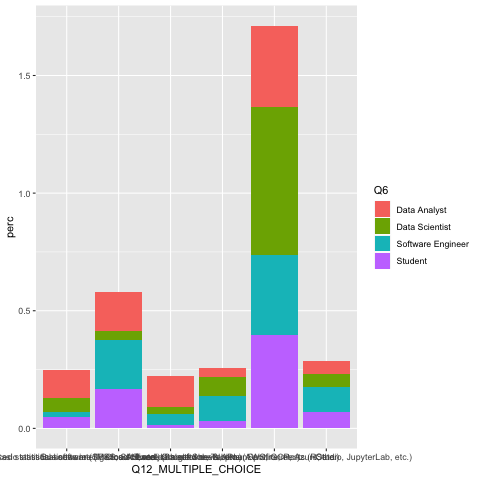

In [121]:
%%R
ggplot()+
    geom_bar(data=d2,aes(x=Q12_MULTIPLE_CHOICE,y=perc,fill=Q6),stat='identity')

In [80]:
survey[['Q13_Part_1','Q13_Part_2','Q13_Part_3']].head()

,Q13_Part_1,Q13_Part_2,Q13_Part_3
0,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...
1,Jupyter/IPython,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,Jupyter/IPython,RStudio,PyCharm


In [81]:
d1.groupby(['Q6','Q13_Part_1']).agg({'index':'count'})


,,index
Q6,Q13_Part_1,
Data Analyst,Jupyter/IPython,1084
Data Scientist,Jupyter/IPython,3191
Software Engineer,Jupyter/IPython,1806
Student,Jupyter/IPython,2770


In [82]:
d1.groupby(['Q6','Q13_Part_2']).agg({'index':'count'})


,,index
Q6,Q13_Part_2,
Data Analyst,RStudio,1002
Data Scientist,RStudio,2119
Software Engineer,RStudio,626
Student,RStudio,1375


In [83]:
d1.groupby(['Q6','Q13_Part_3']).agg({'index':'count'})


,,index
Q6,Q13_Part_3,
Data Analyst,PyCharm,478
Data Scientist,PyCharm,1656
Software Engineer,PyCharm,1102
Student,PyCharm,1579


In [85]:
d1.groupby(['Q6','Q13_Part_7']).agg({'index':'count'})


,,index
Q6,Q13_Part_7,
Data Analyst,MATLAB,342
Data Scientist,MATLAB,955
Software Engineer,MATLAB,619
Student,MATLAB,1630


In [38]:
survey.columns[:30]

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7', 'Q7_OTHER_TEXT', 'Q8',
       'Q9', 'Q10', 'Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4',
       'Q11_Part_5', 'Q11_Part_6', 'Q11_Part_7', 'Q11_OTHER_TEXT',
       'Q12_MULTIPLE_CHOICE', 'Q12_Part_1_TEXT', 'Q12_Part_2_TEXT',
       'Q12_Part_3_TEXT', 'Q12_Part_4_TEXT', 'Q12_Part_5_TEXT',
       'Q12_OTHER_TEXT', 'Q13_Part_1'],
      dtype='object')

In [9]:
survey.groupby('Q12_MULTIPLE_CHOICE').agg({'index':'count'})

,index
Q12_MULTIPLE_CHOICE,
"Advanced statistical software (SPSS, SAS, etc.)",1447
"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",3928
"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",1133
"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",1352
"Local or hosted development environments (RStudio, JupyterLab, etc.)",9554
Other,1784
What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice,1


In [99]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%R -i g1

In [24]:
%R -i g2

In [13]:
%R library(ggplot2)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

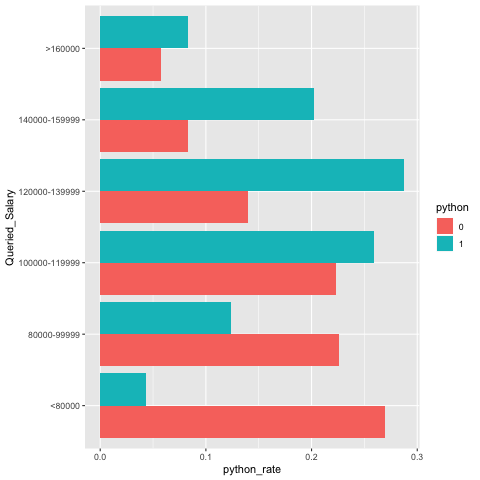

In [14]:
%%R
g1$python <- as.factor(g1$python)
g1$Queried_Salary <- factor (g1$Queried_Salary, levels=c('<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'))

ggplot()+
    geom_bar(aes(x=Queried_Salary, y=python_rate,fill=python), stat='identity',data=g1,position='dodge')+
    coord_flip()

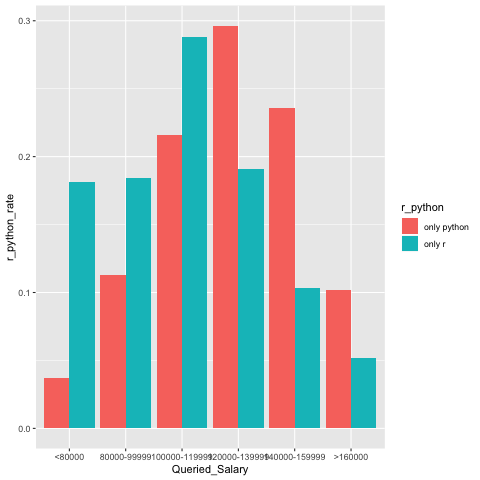

In [42]:
%%R
g2$r_python <- as.factor(g2$r_python)
g2$Queried_Salary <- factor (g2$Queried_Salary, levels=c('<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'))

ggplot()+
    geom_bar(aes(x=Queried_Salary, y=r_python_rate,fill=r_python), stat='identity',data=g2,position='dodge')

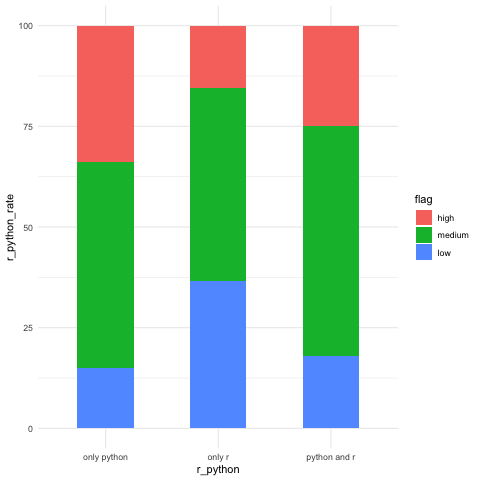

In [101]:
%%R 
g2$r_python <- as.factor(g2$r_python)
g2$Queried_Salary <- factor (g2$Queried_Salary, levels=c('>160000','140000-159999','120000-139999','100000-119999','80000-99999','<80000'))
g2$flag <- factor(g2$flag,levels=c('high','medium','low'))
ggplot()+
    geom_bar(aes(y=r_python_rate , fill=flag  ,x=r_python),width=0.5,position = position_stack(), stat='identity',data=g2)+
    theme_minimal()


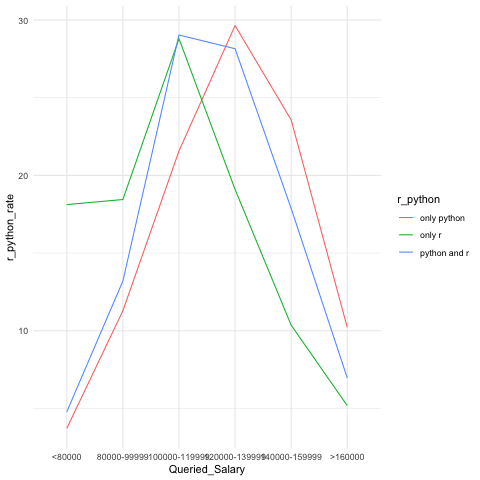

In [34]:
%%R
g2$Queried_Salary <- factor (g2$Queried_Salary, levels=c('<80000','80000-99999','100000-119999','120000-139999','140000-159999','>160000'))

ggplot()+
    geom_line(data=g2,aes(x=Queried_Salary,y=r_python_rate,group=r_python,color=r_python))+
    theme_minimal()

In [ ]:
sur

In [ ]:
df.loc[(df.Queried_Salary[-6:]=='<80000'),'mean_salary']=

In [39]:
df.groupby('Company_Industry').

array(['Health Care', nan, 'Government', 'Banks and Financial Services',
       'Education and Schools', 'Consulting and Business Services',
       'Energy and Utilities', 'Aerospace and Defense',
       'Internet and Software', 'Transport and Freight', 'Organization',
       'Telecommunications', 'Retail', 'Computers and Electronics',
       'Consumer Goods and Services', 'Insurance',
       'Restaurants, Travel and Leisure', 'Media, News and Publishing',
       'Pharmaceuticals', 'Industrial Manufacturing', 'Auto',
       'Real Estate', 'Human Resources and Staffing',
       'Food and Beverages', 'Construction',
       'RetailConsumer Goods and Services', 'InsuranceHealth Care',
       'Agriculture and Extraction',
       'Industrial ManufacturingAgriculture and Extraction',
       'Industrial ManufacturingConstruction', 'Real EstateReal Estate',
       'Food and BeveragesConsulting and Business Services',
       'Restaurants, Travel and LeisureConsulting and Business Services',
    

In [3]:
df.groupby('Queried_Salary').agg('count')

,Unnamed: 0,Job_Title,Link,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
Queried_Salary,,,,,,,,,,,,,,,,,,,,,
100000-119999,1394,1394,1394,1394,1360,1394,1383,1186,1186,1383,...,1394,1394,1394,1394,1394,1394,1394,1394,1394,1394
120000-139999,1292,1292,1292,1292,1272,1292,1252,1080,1080,1252,...,1292,1292,1292,1292,1292,1292,1292,1292,1292,1292
140000-159999,873,873,873,873,862,873,857,699,699,857,...,873,873,873,873,873,873,873,873,873,873
80000-99999,953,953,953,953,894,953,944,812,812,944,...,953,953,953,953,953,953,953,953,953,953
<80000,788,788,788,788,687,788,786,665,665,786,...,788,788,788,788,788,788,788,788,788,788
>160000,415,415,415,415,408,415,389,311,311,389,...,415,415,415,415,415,415,415,415,415,415
